### Building a Support Vector Machine Pipleine for Website Classification

##### Importing and visualizing website classification data downloaded from Kaggle

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
website_data = pd.read_csv("website_classification.csv")

In [55]:
website_data.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [56]:
website = website_data.iloc[:, 2:4].copy()
website.head()

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel


In [57]:
website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cleaned_website_text  1408 non-null   object
 1   Category              1408 non-null   object
dtypes: object(2)
memory usage: 22.1+ KB


Text(0.5, 1.0, 'CountPlot')

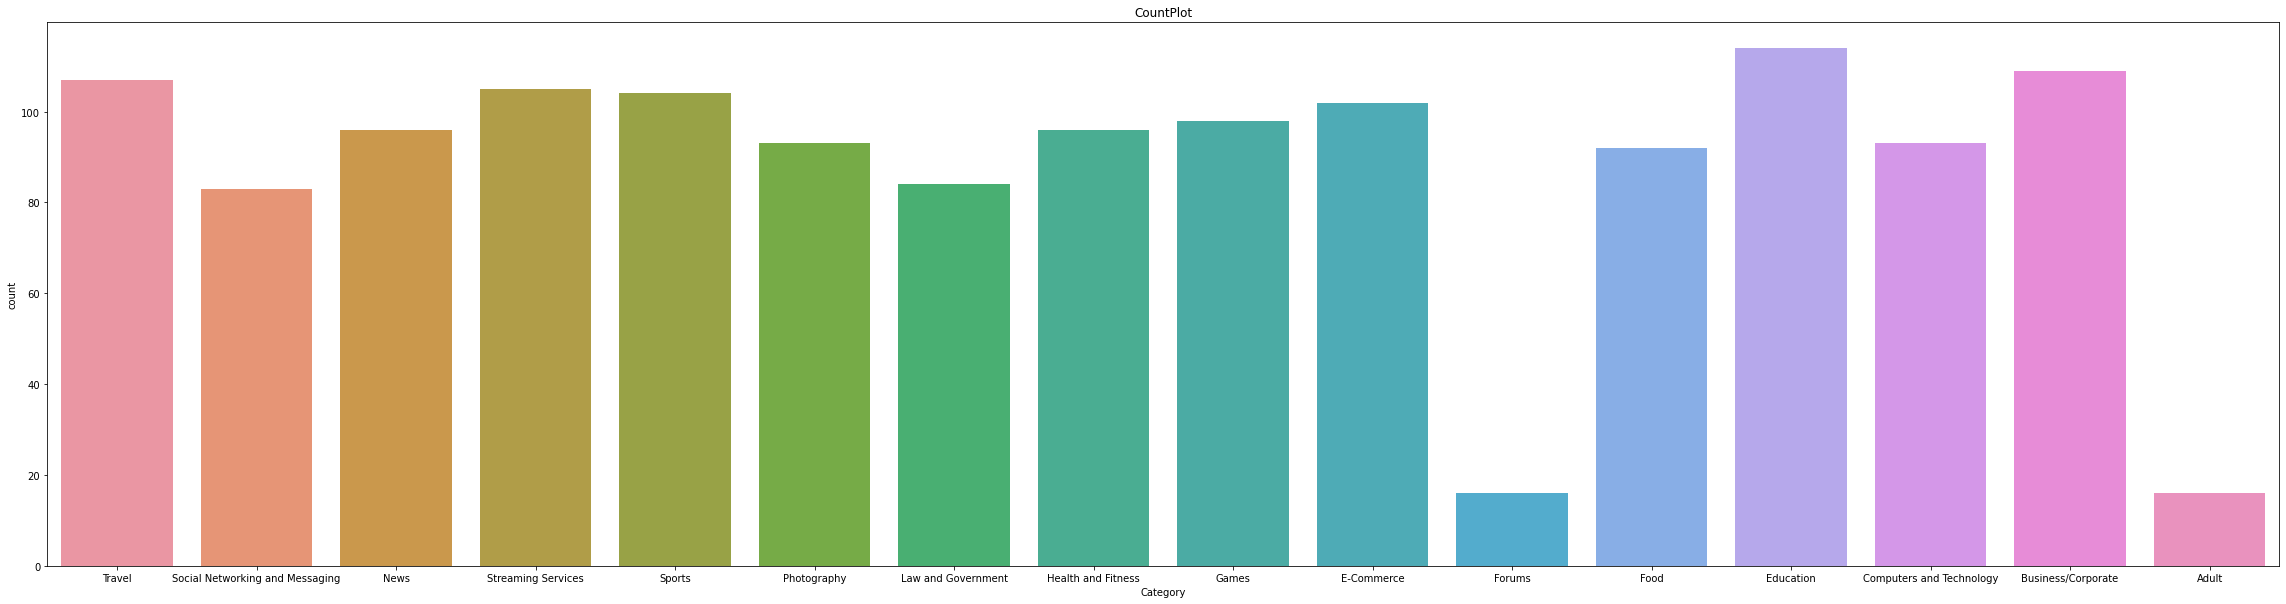

In [58]:
plt.figure(figsize = (40, 10))
sns.countplot(x=website.Category)
plt.xlabel('Category')
plt.title('CountPlot')


##### Test Train Split

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [60]:
X= website['cleaned_website_text']
y = website['Category']

In [61]:
le = LabelEncoder()
le.fit(y)

y = le.transform(y)

In [62]:
y

array([15, 15, 15, ...,  0,  0,  0])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Creating a Linear Support Vector Machine Pipeline

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [65]:
text_classifier = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
text_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [66]:
predictions = text_classifier.predict(X_test)

##### Evaluating the pipeline

In [67]:
from sklearn.metrics import  classification_report

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      0.88      0.88        40
           2       0.73      0.88      0.80        25
           3       0.89      0.89      0.89        36
           4       0.96      0.96      0.96        45
           5       0.94      0.97      0.95        30
           6       1.00      0.25      0.40         4
           7       0.94      0.91      0.92        33
           8       0.96      1.00      0.98        23
           9       1.00      0.97      0.98        29
          10       0.97      0.97      0.97        36
          11       0.97      0.94      0.95        33
          12       1.00      0.79      0.88        29
          13       0.95      0.97      0.96        39
          14       0.89      1.00      0.94        31
          15       0.93      0.96      0.94        26

    accuracy                           0.93       465
   macro avg       0.94   

##### Setting up the pipeline for practical use

In [69]:
le.inverse_transform([text_classifier.predict(["Sportskeeda - For the hardcore sports fan Fans don't just follow the sport, they feel it. We're one of you, and we strive to keep you on top of every possible sports trend by creating engaging and insightful content at lightning-quick speed. Established in 2009, Sportskeeda is a global sports content platform that covers the world's biggest sports and esports subjects and serves over 100 Million fans every month. Our passionate team comprises top journalists from around the world who produce hundreds of well-researched content pieces on a daily basis.We are a Great Place to Work certified organization, with employees and contributors working from various corners of the globe."])[0]])

array(['Sports'], dtype=object)

In [70]:
label_encoder_mapping = dict(zip(le.transform(le.classes_), le.classes_))
label_encoder_mapping

{0: 'Adult',
 1: 'Business/Corporate',
 2: 'Computers and Technology',
 3: 'E-Commerce',
 4: 'Education',
 5: 'Food',
 6: 'Forums',
 7: 'Games',
 8: 'Health and Fitness',
 9: 'Law and Government',
 10: 'News',
 11: 'Photography',
 12: 'Social Networking and Messaging',
 13: 'Sports',
 14: 'Streaming Services',
 15: 'Travel'}

In [71]:
import pickle

In [72]:
le_file = open("label_encoder_mapping.pkl", "wb")
pickle.dump(label_encoder_mapping, le_file)
le_file.close()

In [73]:
with open('model.pkl', 'wb') as model_file:
  pickle.dump(text_classifier, model_file)
